In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/PRAK PENGOLAHAN CITRA/

/content/drive/MyDrive/PRAK PENGOLAHAN CITRA


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt, floor, ceil
from PIL import Image
import math

img = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

Text(0.5, 1.0, 'Translation Image')

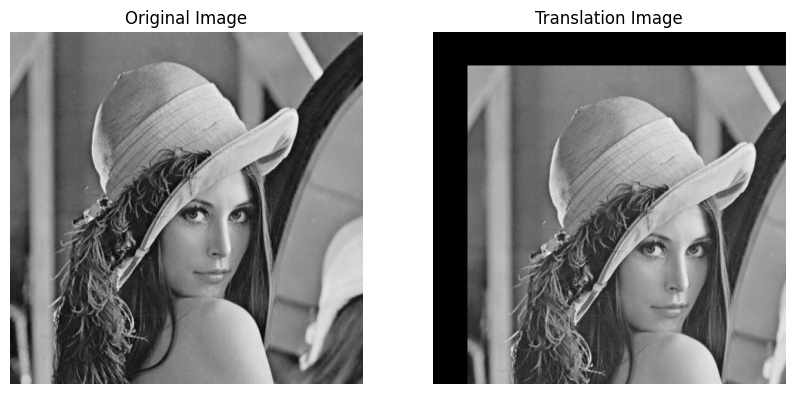

In [ ]:
M = np.float32([[1, 0, 50], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(dst, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Translation Image')

Text(0.5, 1.0, 'Reflected Image in x and y axis')

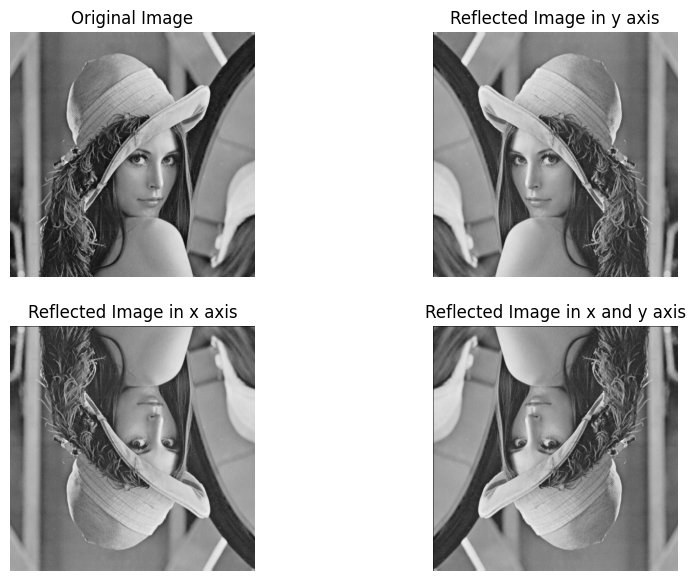

In [ ]:
M1 = np.float32([[-1, 0, cols],
                 [0, 1, 0],
                 [0, 0, 1]])

M2 = np.float32([[1, 0, 0],
                 [0, -1, rows],
                 [0, 0, 1]])

M3 = np.float32([[-1, 0, cols],
                 [0, -1, rows],
                 [0, 0, 1]])

reflected_img1 = cv2.warpPerspective(img, M1, (int(cols), int(rows)))
reflected_img2 = cv2.warpPerspective(img, M2, (int(cols), int(rows)))
reflected_img3 = cv2.warpPerspective(img, M3, (int(cols), int(rows)))

baris = 2
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(reflected_img1, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Reflected Image in y axis')

fig.add_subplot(baris, kolom, 3)
plt.imshow(reflected_img2, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Reflected Image in x axis')

fig.add_subplot(baris, kolom, 4)
plt.imshow(reflected_img3, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Reflected Image in x and y axis')

Text(0.5, 1.0, 'Translation Image')

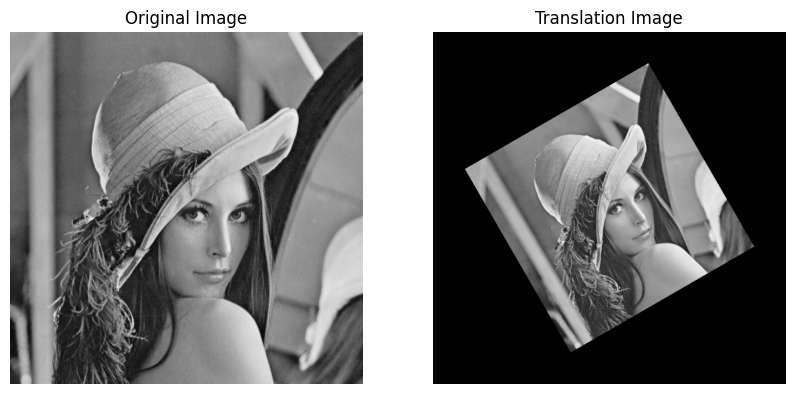

In [ ]:
img_rotation = cv2.warpAffine(img, cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))

baris = 1
kolom = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(baris, kolom, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(baris, kolom, 2)
plt.imshow(img_rotation, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title('Translation Image')

In [ ]:
def nearest_interpolation(image, dimension):
    new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))
    enlarge_time = int(
        sqrt((dimension[0] * dimension[1]) / (image.shape[0]*image.shape[1])))

    for i in range(dimension[0]):
        for j in range(dimension[1]):
          row = floor(i / enlarge_time)
          column = floor(j / enlarge_time)
          new_image[i, j] = image[row, column]

    return new_image

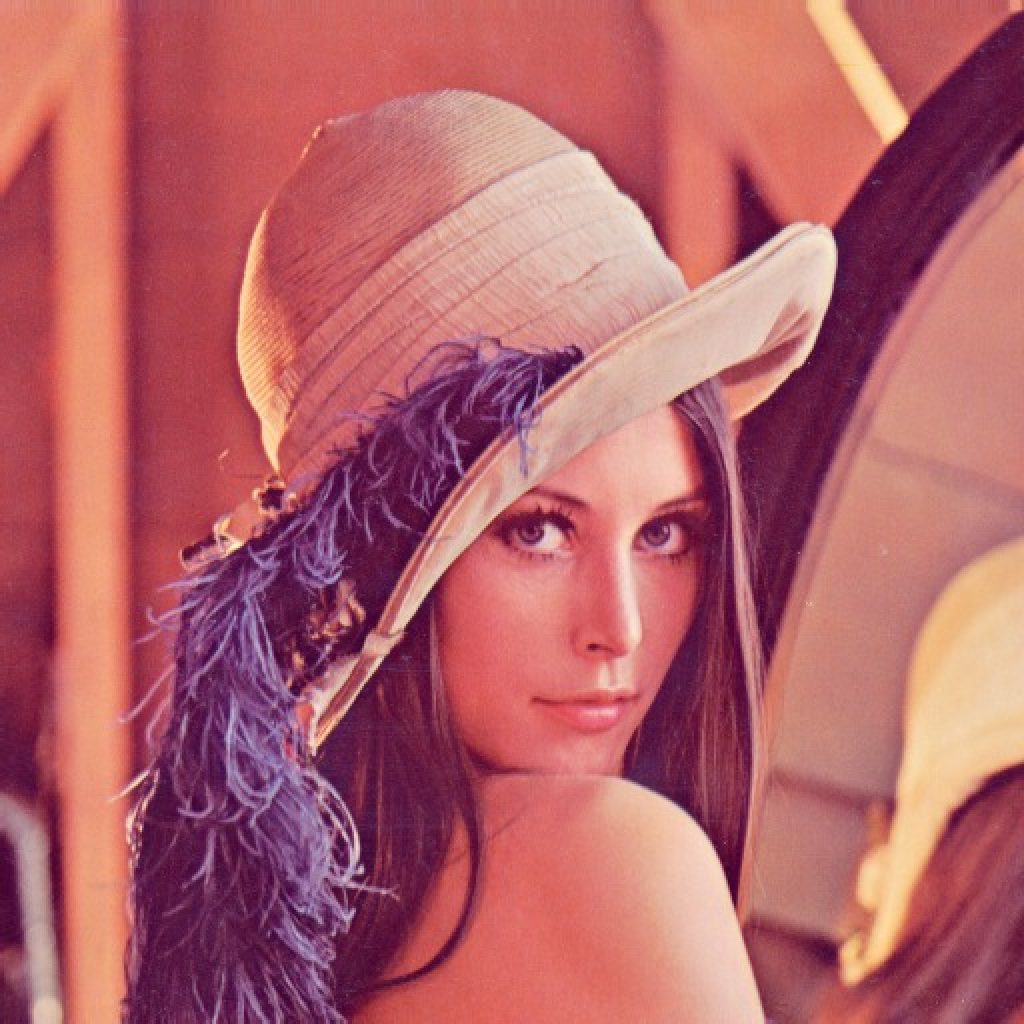

In [ ]:
dimension = 1024, 1024
img = cv2.imread('Lenna.jpg')
nn_img_algo = nearest_interpolation(img, dimension)
cv2_imshow(nn_img_algo)

In [ ]:
def bilinear_interpolation(image, dimension):
  height = image.shape[0]
  width = image.shape[1]
  scale_x = (width)/(dimension[1])
  scale_y = (height)/(dimension[0])
  new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

  for k in range(3):
    for i in range(dimension[0]):
      for j in range(dimension[1]):
        x = (j+0.5)*(scale_x) - 0.5
        y = (i+0.5)*(scale_y) - 0.5

        x_int = int(x)
        y_int = int(y)

        x_int = min(x_int, width-2)
        y_int = min(y_int, height-2)

        x_diff = x - x_int
        y_diff = y - y_int

        a = image[y_int, x_int, k]
        b = image[y_int, x_int+1, k]
        c = image[y_int+1, x_int, k]
        d = image[y_int+1, x_int+1, k]

        pixel = a*(1-x_diff) * (1-y_diff)+ b*(x_diff) * (1-y_diff) + c*(1-x_diff)*(y_diff) + d*x_diff*y_diff

        new_image[i, j, k] = pixel.astype(np.uint8)

  return new_image

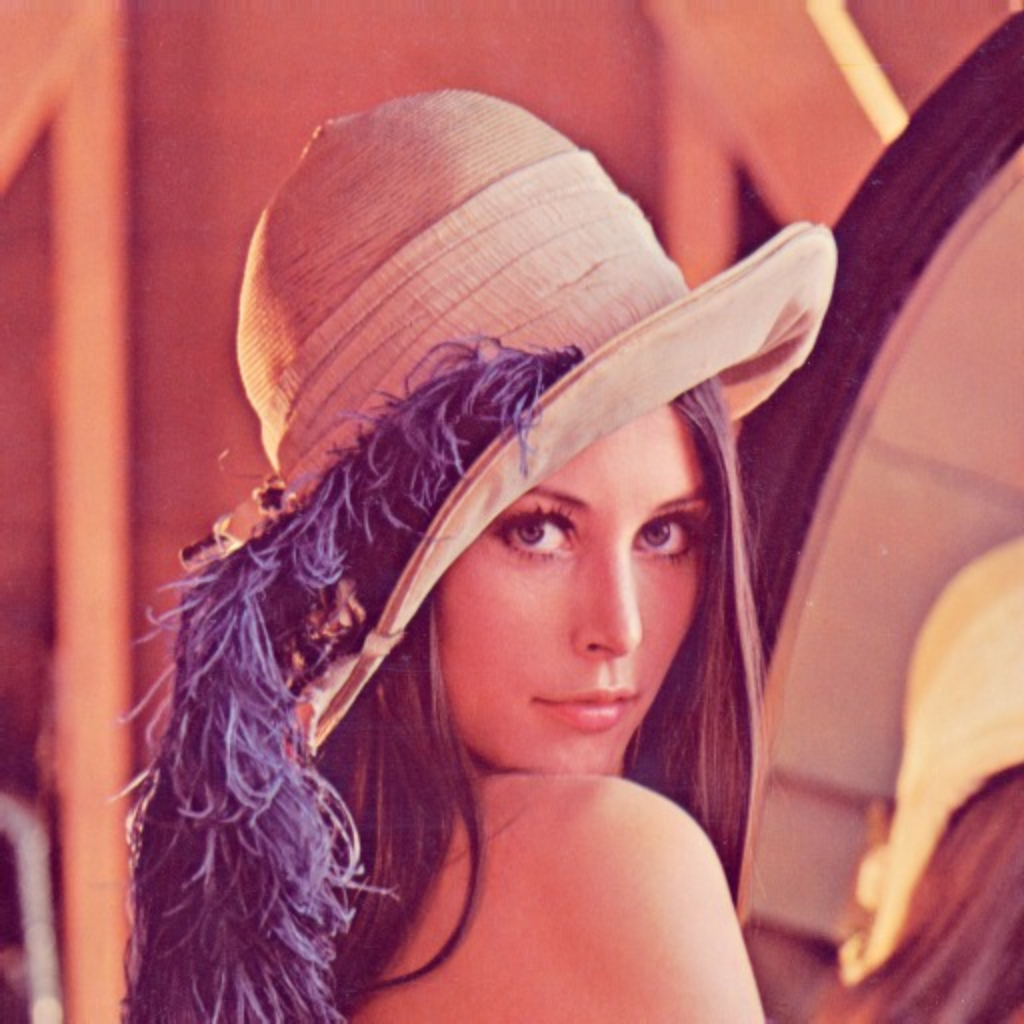

In [ ]:
dimension = 1024, 1024
bl_img_algo = bilinear_interpolation(img, dimension)
cv2_imshow(bl_img_algo)